In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset Preparation
This dataset shows about the readings from a telescope 
In this example we are going to predict whether the rays are going to be gamma or hydron using the Classification principle of Machine Learning

In [11]:
# Deletion of unnamed column
df = pd.read_csv('Datasets/telescope_data.csv', index_col=0)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

Differentiate the classcolumn with num series for "g" and "h"

In [12]:
df["class"] = (df['class'] == "g").astype(int)

In [13]:
df["class"].unique()

array([1, 0])

- Features are the elements passed in our model in order for us to predict the label
- Label which is the class column.
This is actually Supervised Learning

In [14]:
cols = df[df.columns]

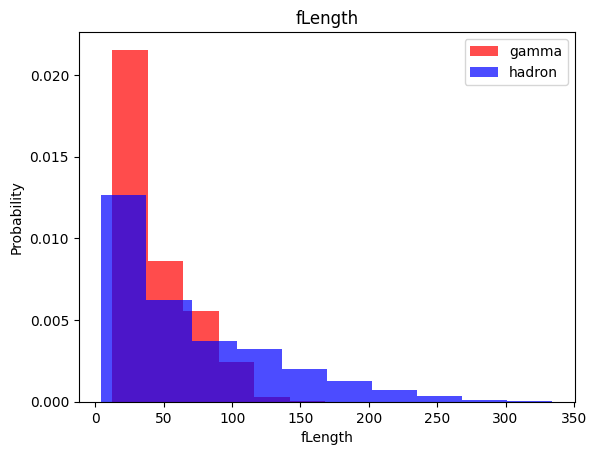

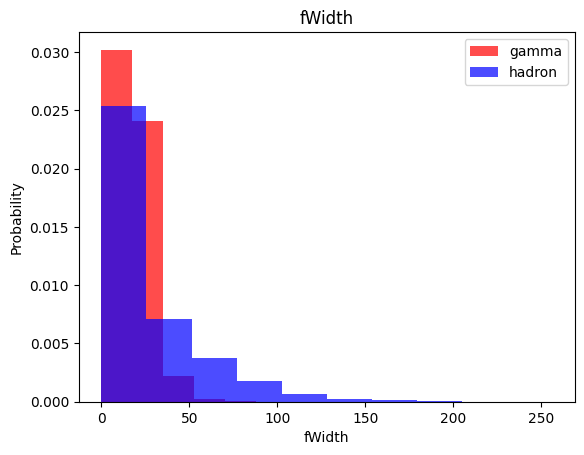

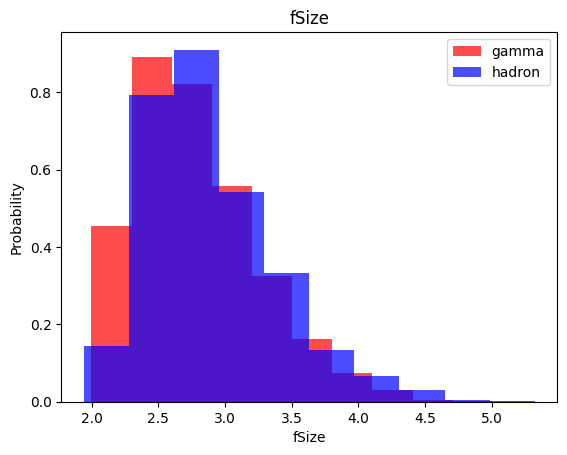

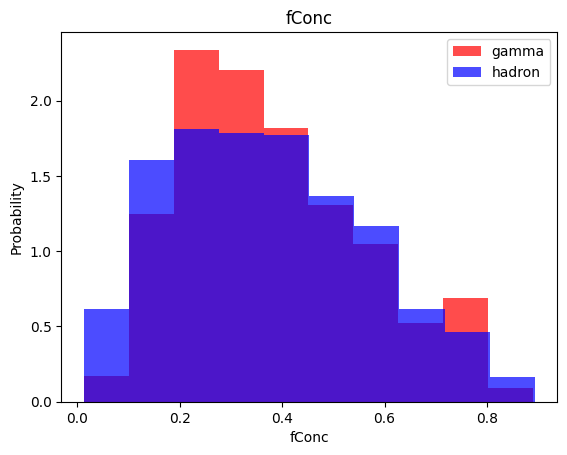

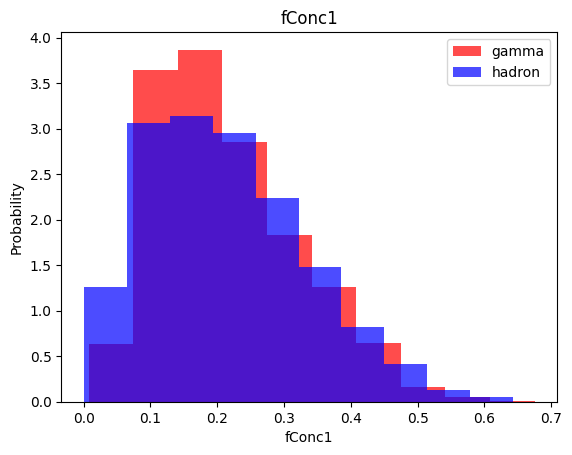

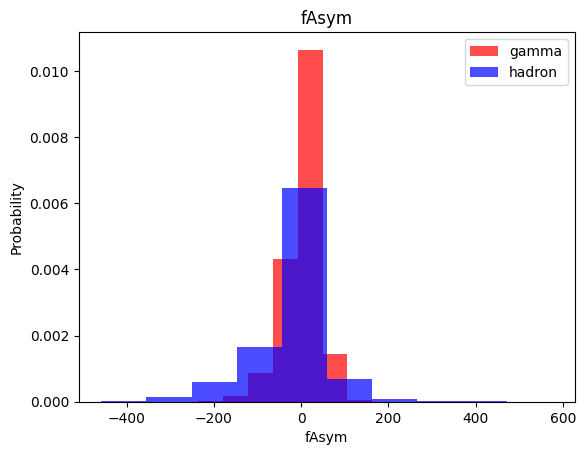

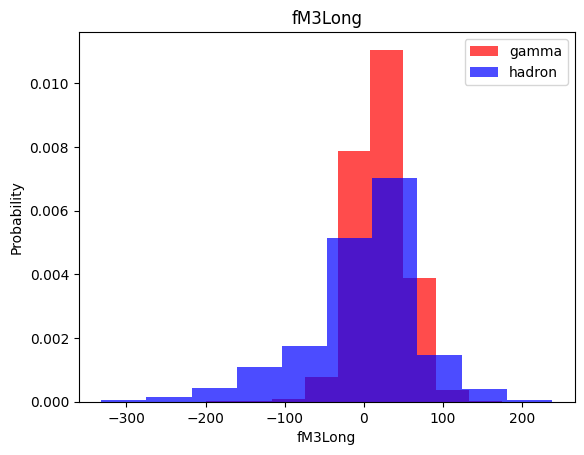

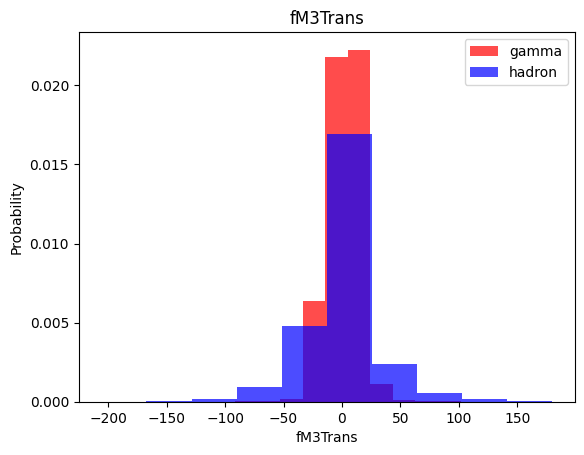

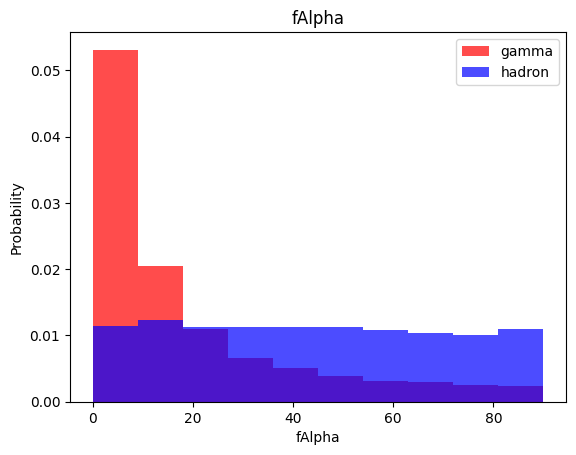

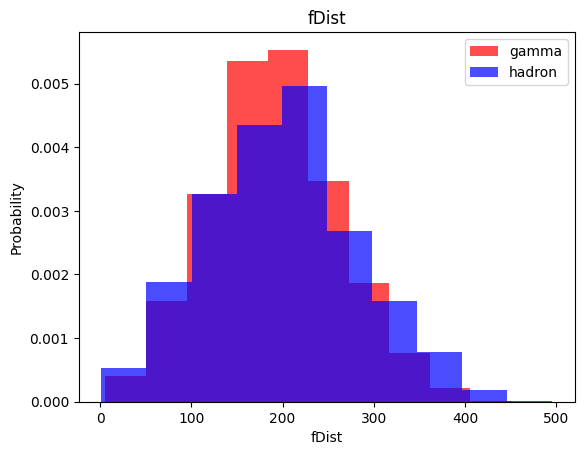

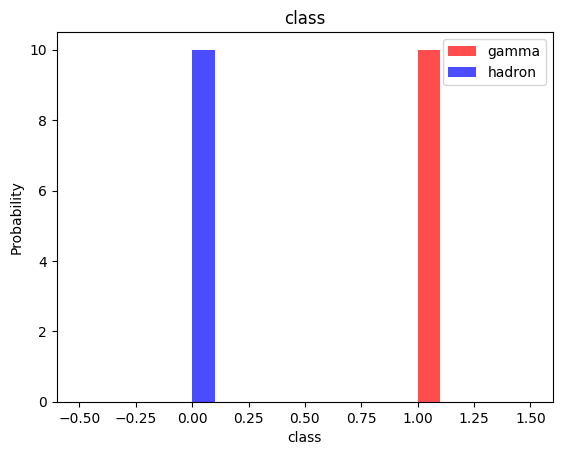

In [15]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="red", label ="gamma", alpha= 0.7, density=True )
    plt.hist(df[df["class"]==0][label], color="blue", label ="hadron", alpha= 0.7, density=True )
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Training , Validaating and Testing Dataset

In [16]:
train , valid, test =np.split(df.sample(frac=1), (int(0.6*len(df)), int(0.8*len(df))))

c:\Users\Thorne\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Scaling the dataset values 


In [17]:
def scaled(df, oversample= False): #scaler used to ensure the same sample size for both of the features data
    x =df[df.columns[:-1]].values
    y =df[df.columns[-1]].values

    scaler = StandardScaler()
    x= scaler.fit_transform(x) # Take x and fit the standard scaler to x and scale the values 
    if oversample:
        ros = RandomOverSampler()
        x , y =ros.fit_resample(x,y) # Take less class and sample fromther eto increase the values of sample

    data =np.hstack((x, np.reshape(y, (-1,1)))) #reshaping the data to a similar array stack

    return data, x, y

In [18]:
train, x_train, y_train = scaled(train, oversample =True)
valid, x_valid, y_valid = scaled(valid, oversample =False)
test, x_test, y_test = scaled(test, oversample =False)

#### kNN- K Nearest Neighbours
- Importation of Kneighbours and classification reports package from sklearn 


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y_prediction = knn_model.predict(x_test)

In [22]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1317
           1       0.86      0.86      0.86      2487

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#### Naive Bayes Rule
Classification techniques with the assumption that the prescence of a particular feature in a class is un-related to the prescence of any other feature.
- Applies the Bayes probability technique

In [23]:
# Imprtation of the Bayes package
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [25]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.65      0.41      0.51      1317
           1       0.74      0.88      0.80      2487

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [28]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1317
           1       0.85      0.81      0.83      2487

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



### Neural Networks


In [29]:
import tensorflow as tf

In [30]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [31]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


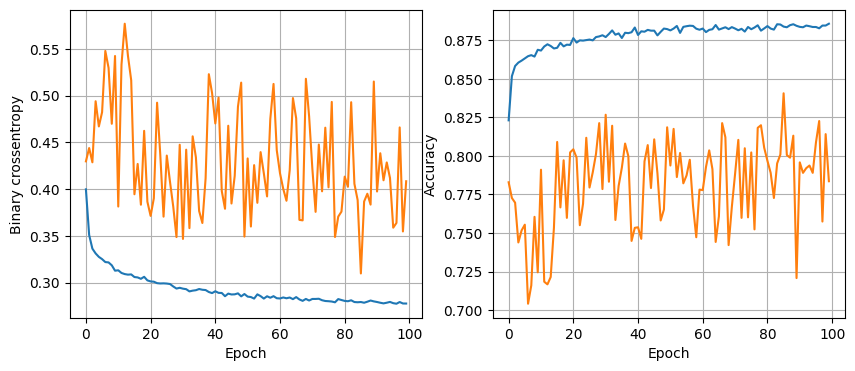

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8633
16 nodes, dropout 0, lr 0.01, batch size 64


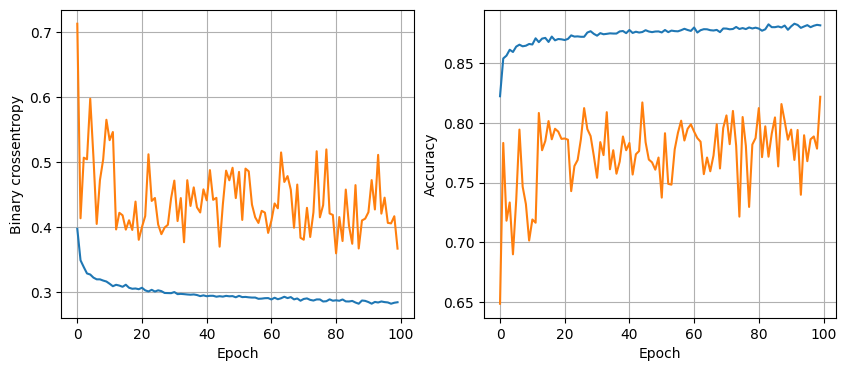

119/119 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.01, batch size 128


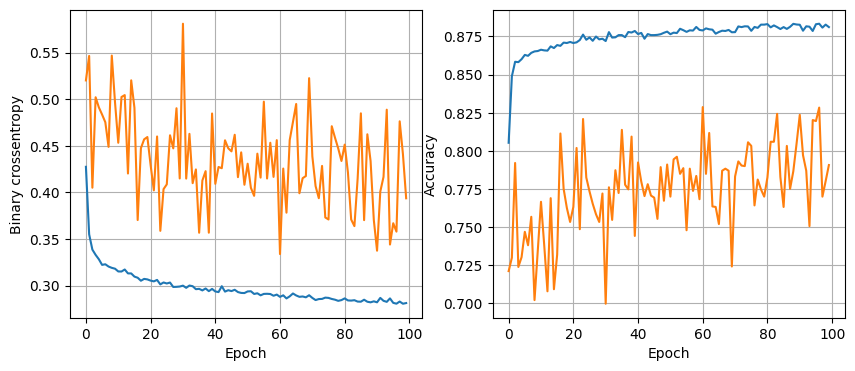

119/119 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch size 32


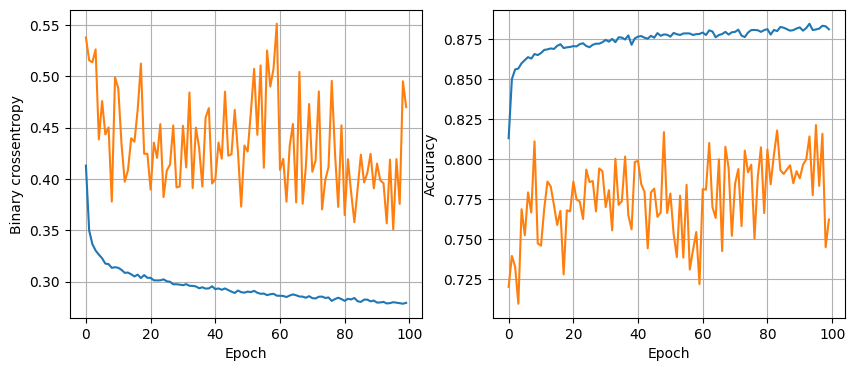

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8754
16 nodes, dropout 0, lr 0.005, batch size 64


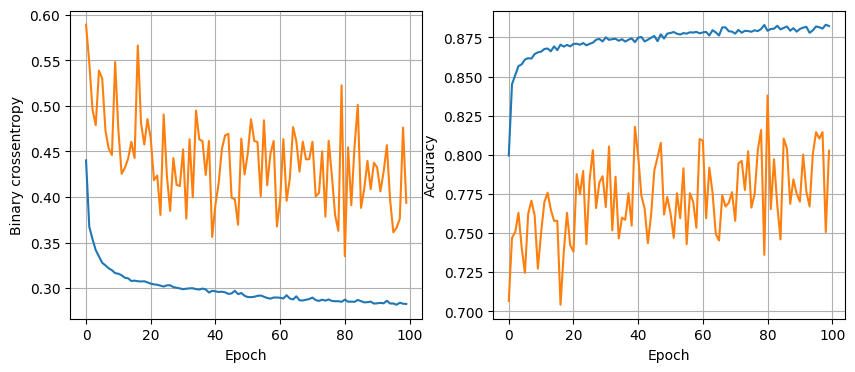

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8649
16 nodes, dropout 0, lr 0.005, batch size 128


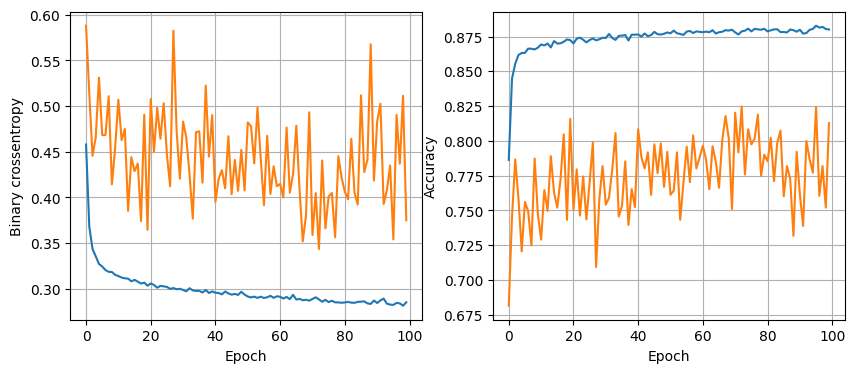

119/119 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8693
16 nodes, dropout 0, lr 0.001, batch size 32


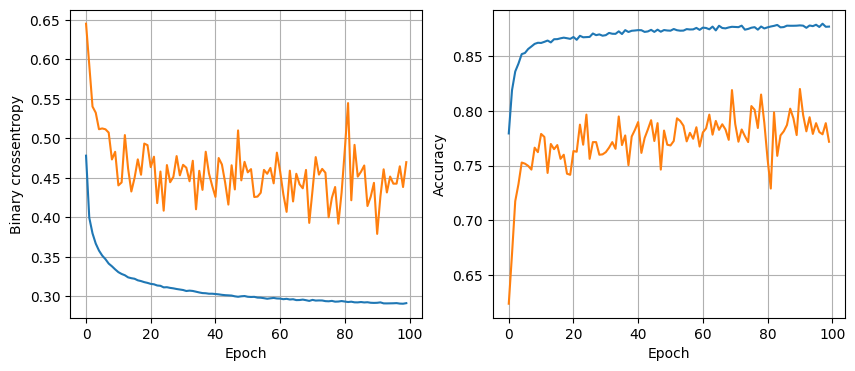

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.001, batch size 64


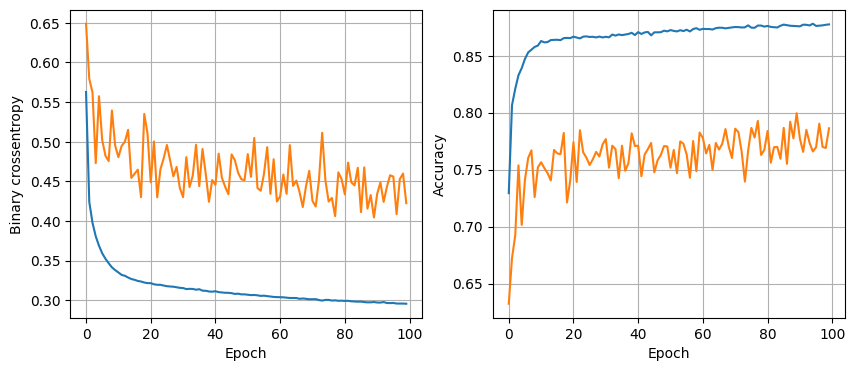

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.001, batch size 128


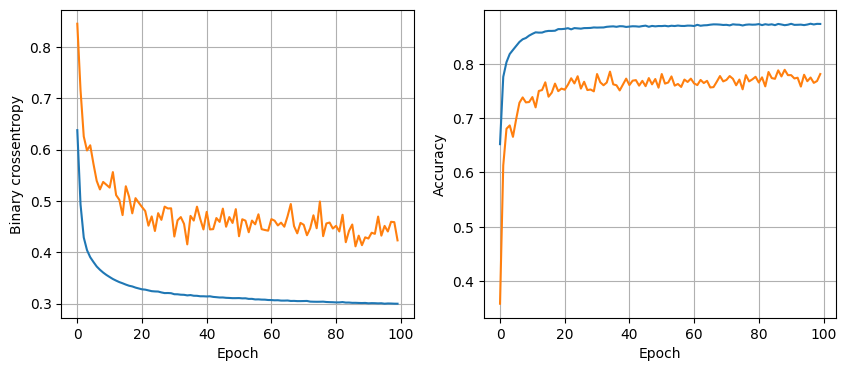

119/119 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.01, batch size 32


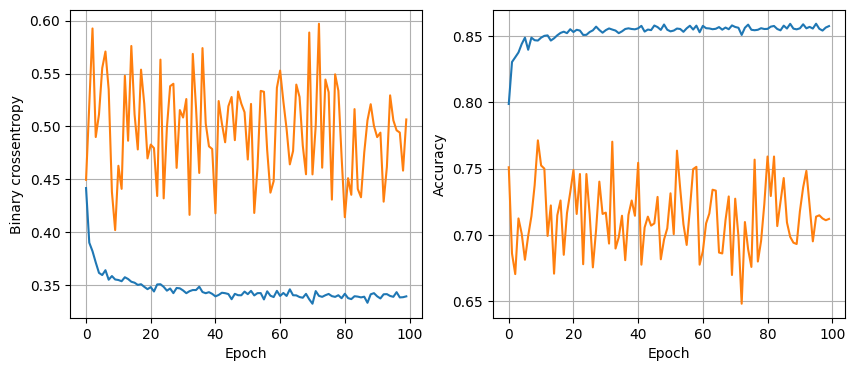

119/119 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.01, batch size 64


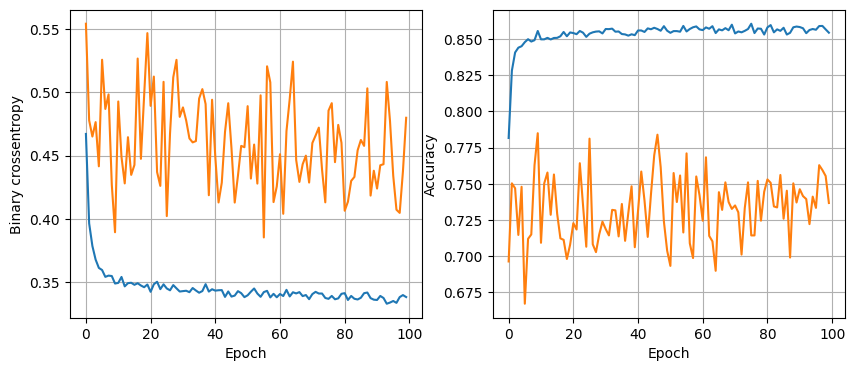

119/119 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8638
16 nodes, dropout 0.2, lr 0.01, batch size 128


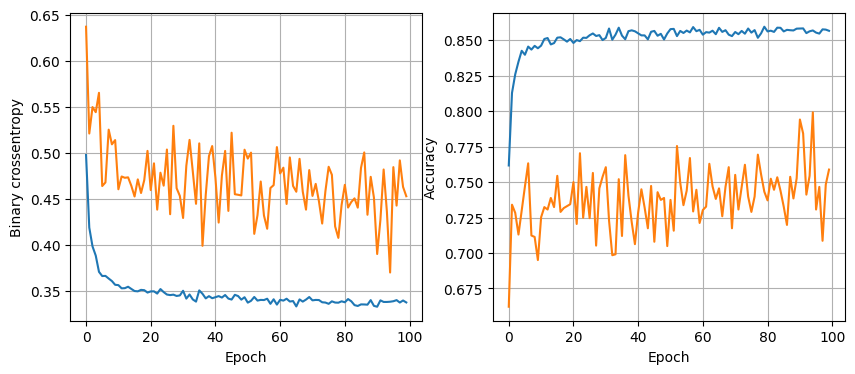

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.005, batch size 32


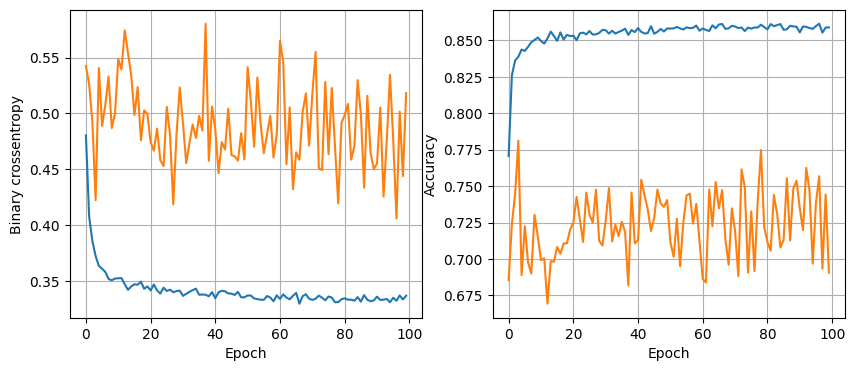

119/119 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8623
16 nodes, dropout 0.2, lr 0.005, batch size 64


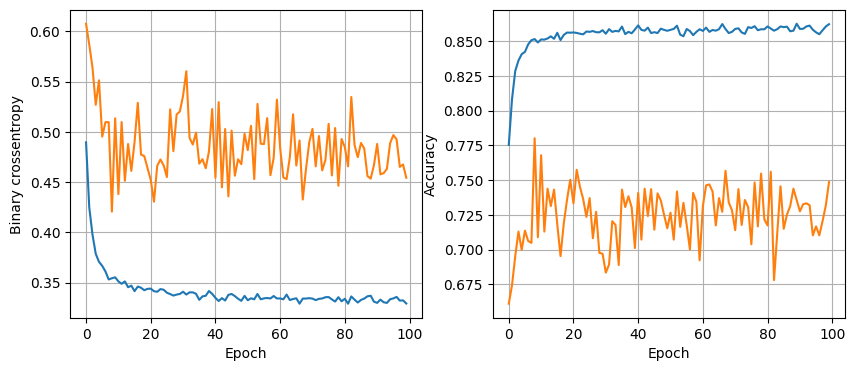

119/119 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8696
16 nodes, dropout 0.2, lr 0.005, batch size 128


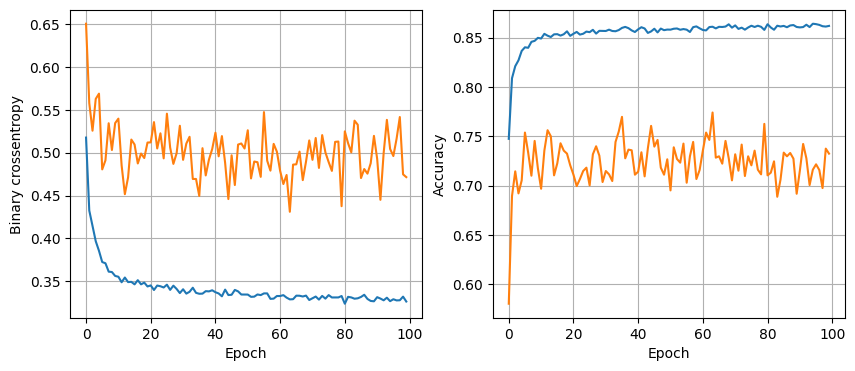

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.001, batch size 32


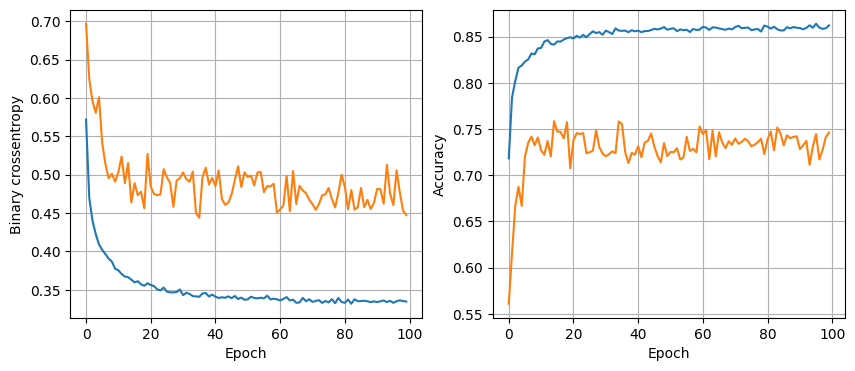

119/119 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.001, batch size 64


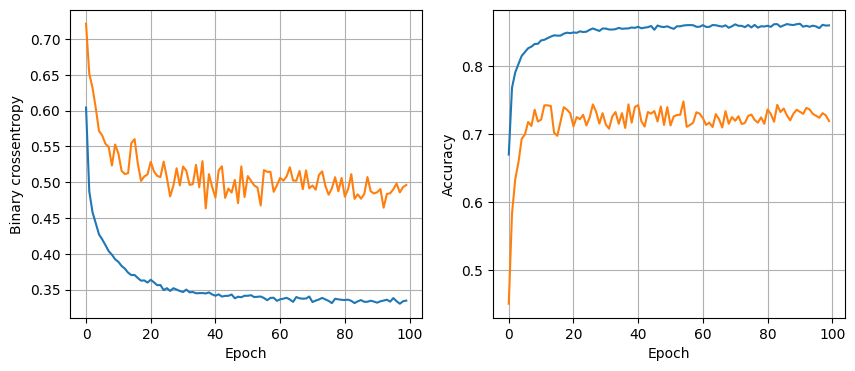

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.001, batch size 128


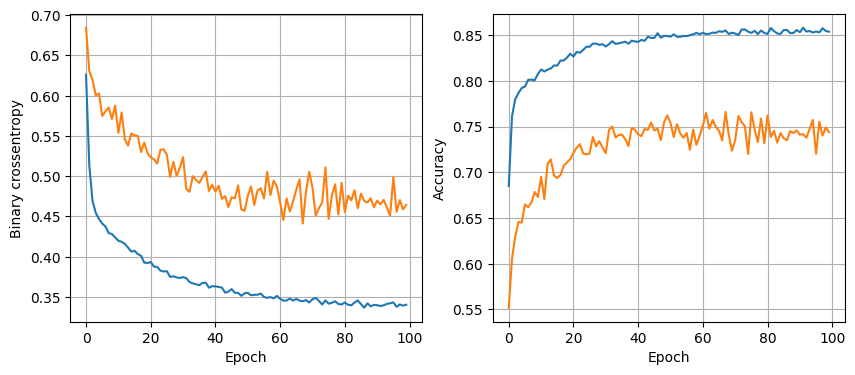

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.01, batch size 32


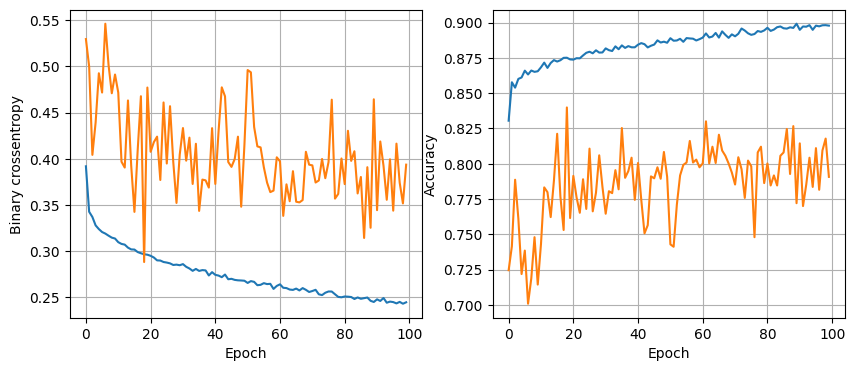

119/119 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.01, batch size 64


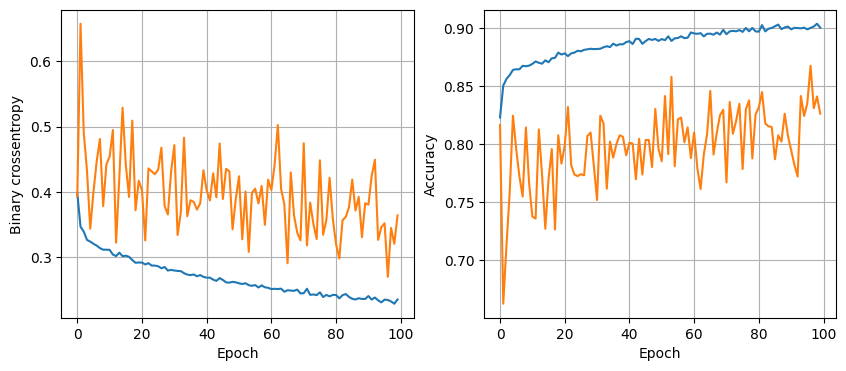

119/119 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8573
32 nodes, dropout 0, lr 0.01, batch size 128


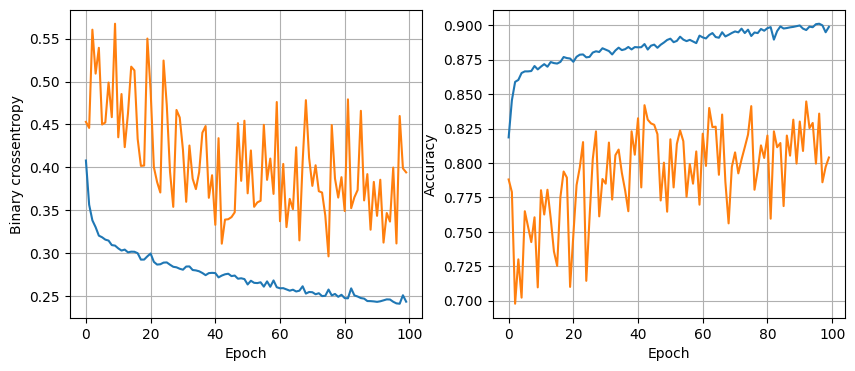

119/119 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8596
32 nodes, dropout 0, lr 0.005, batch size 32


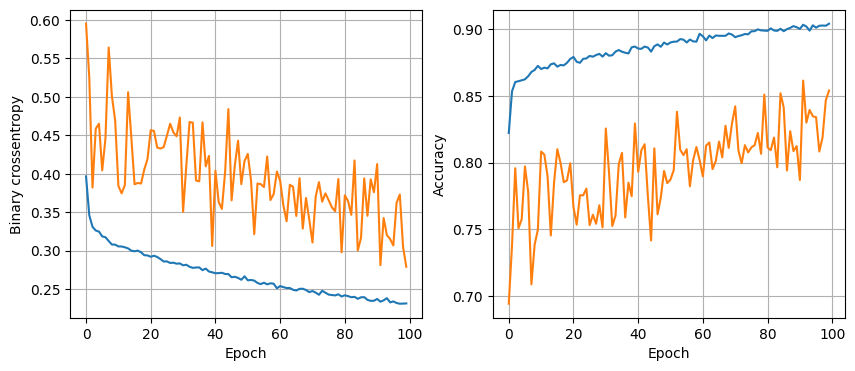

119/119 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8544
32 nodes, dropout 0, lr 0.005, batch size 64


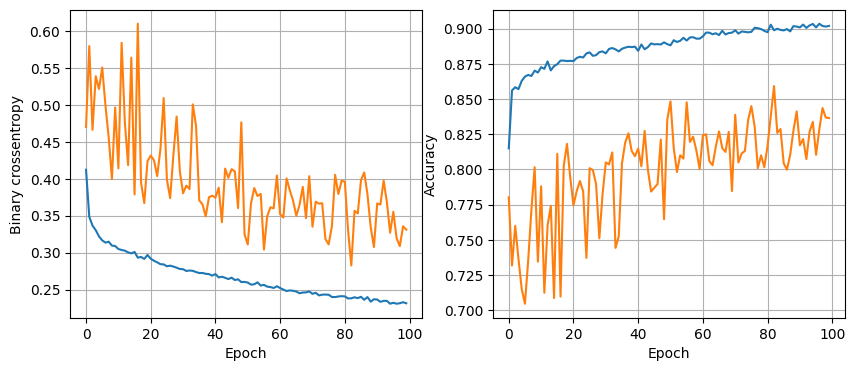

119/119 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8636
32 nodes, dropout 0, lr 0.005, batch size 128


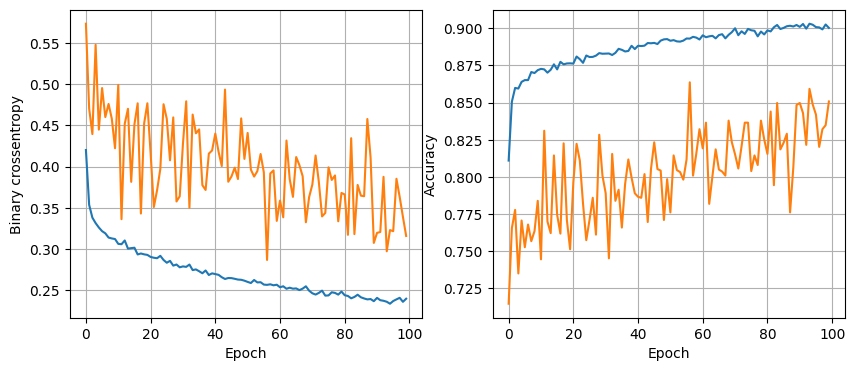

119/119 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.001, batch size 32


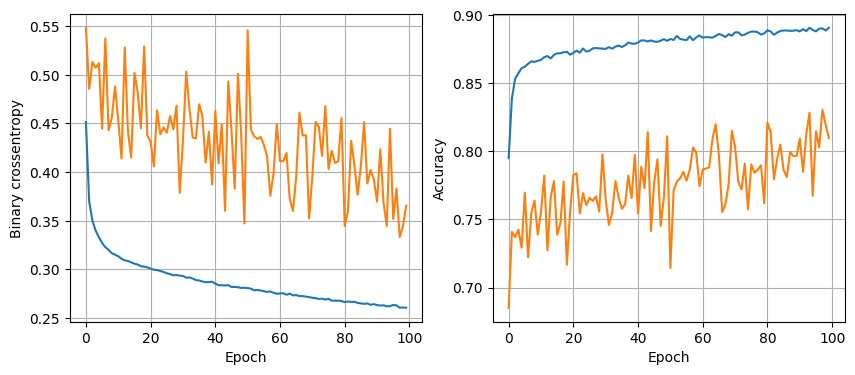

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8657
32 nodes, dropout 0, lr 0.001, batch size 64


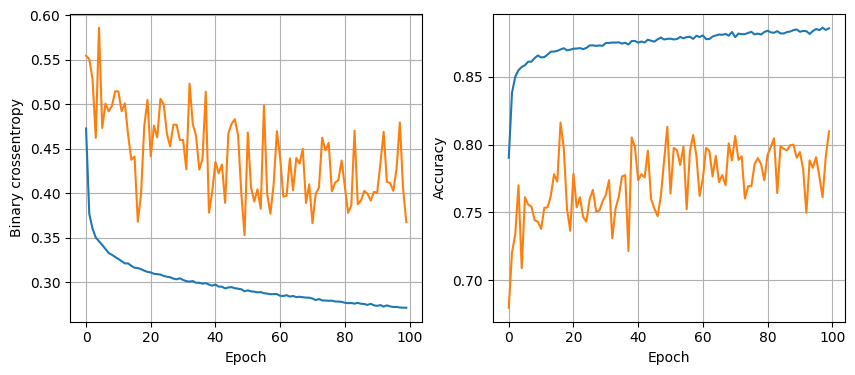

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.001, batch size 128


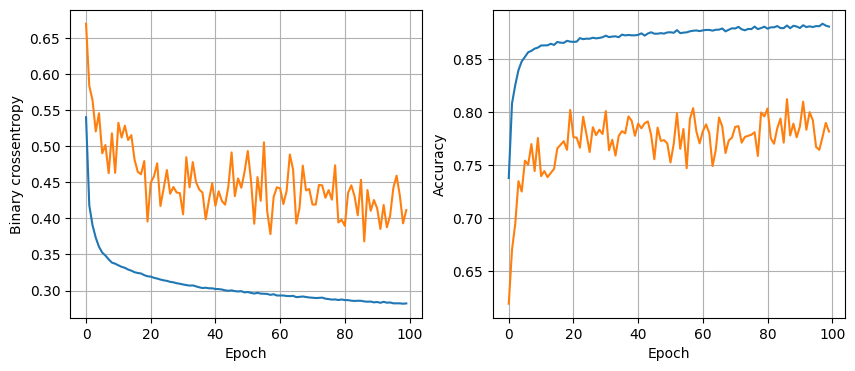

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8638
32 nodes, dropout 0.2, lr 0.01, batch size 32


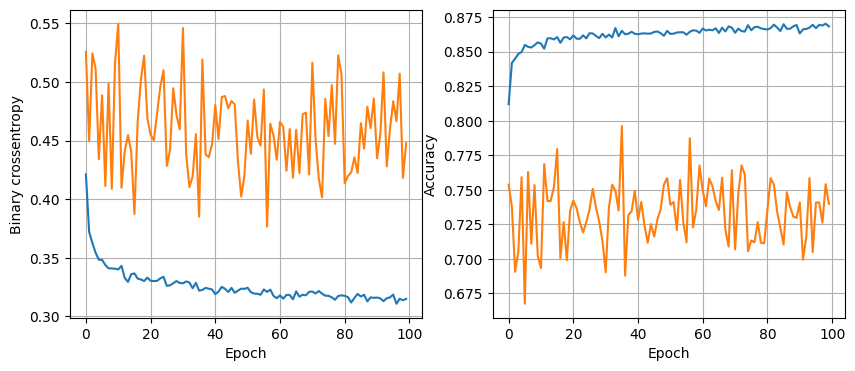

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8644
32 nodes, dropout 0.2, lr 0.01, batch size 64


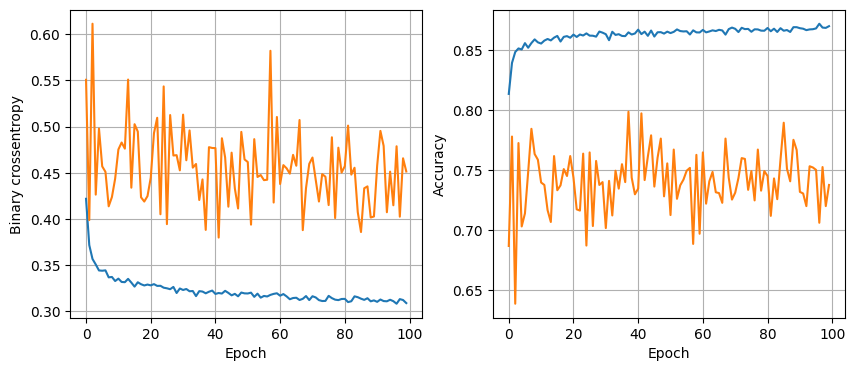

119/119 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.01, batch size 128


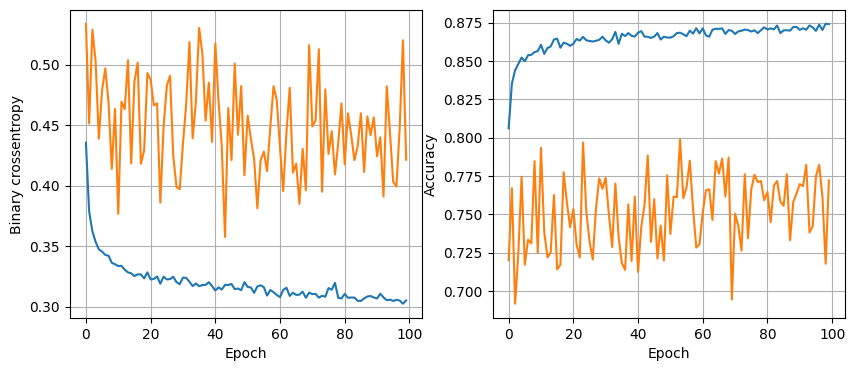

119/119 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.005, batch size 32


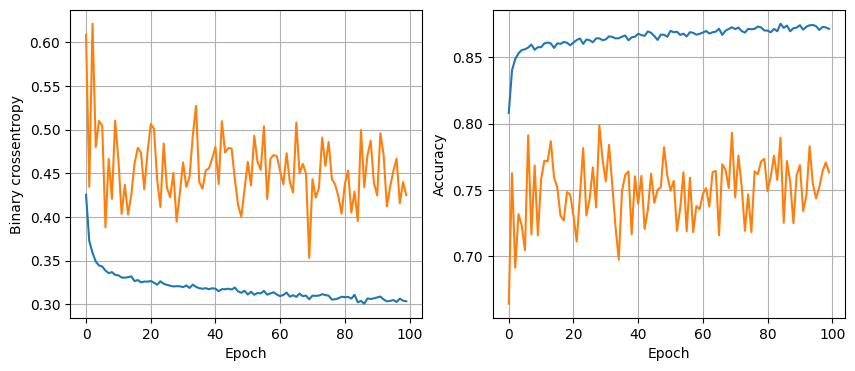

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.005, batch size 64


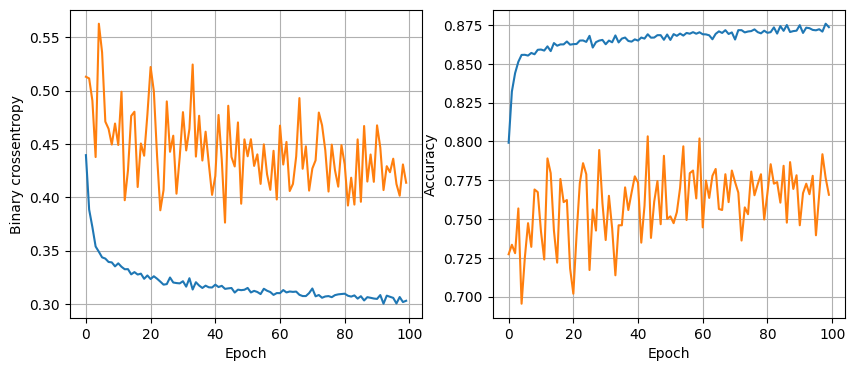

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.005, batch size 128


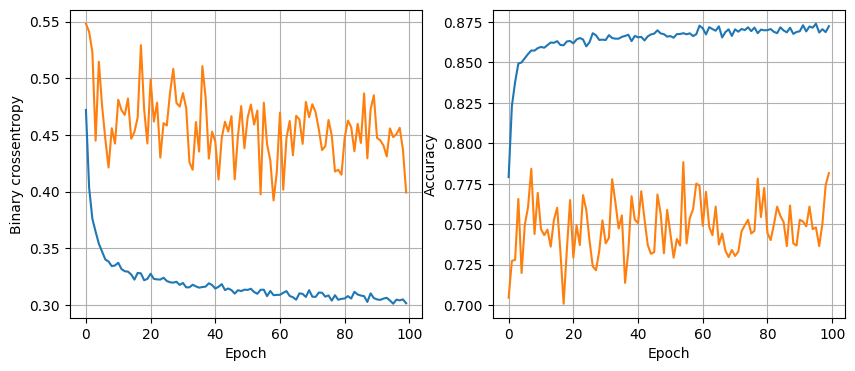

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8644
32 nodes, dropout 0.2, lr 0.001, batch size 32


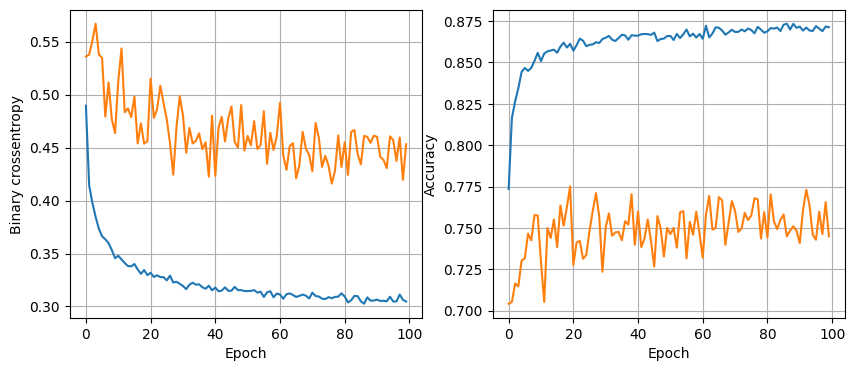

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.001, batch size 64


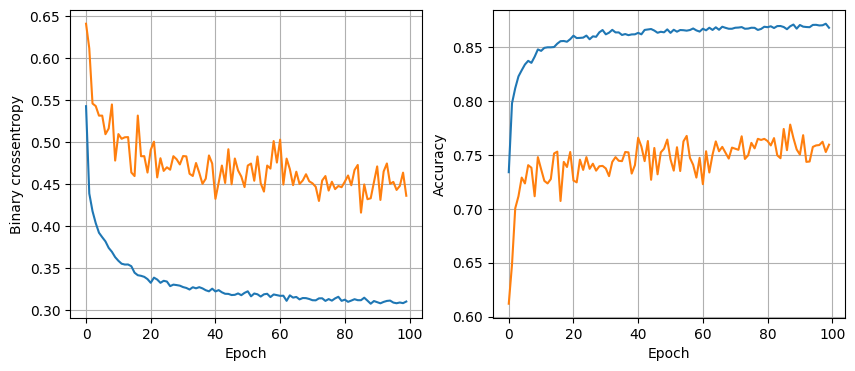

119/119 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.001, batch size 128


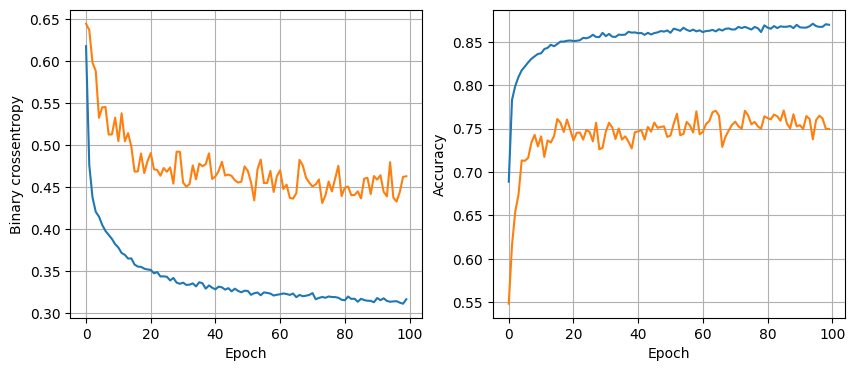

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8741
64 nodes, dropout 0, lr 0.01, batch size 32


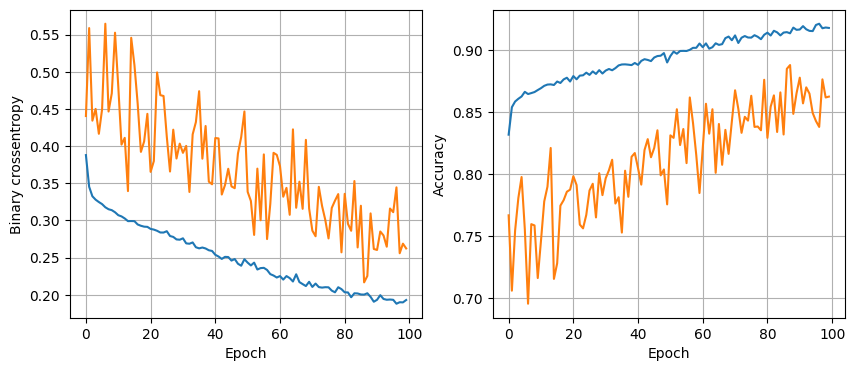

119/119 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.8530
64 nodes, dropout 0, lr 0.01, batch size 64


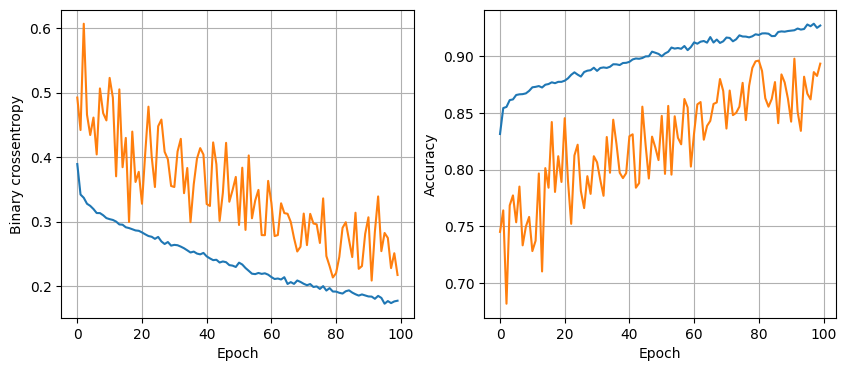

119/119 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.8509
64 nodes, dropout 0, lr 0.01, batch size 128


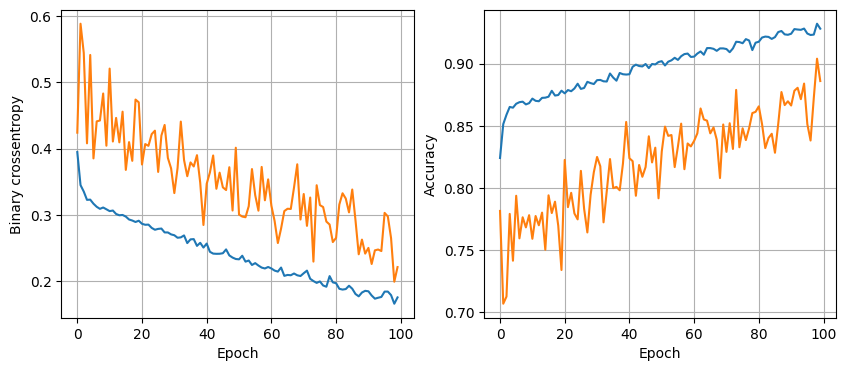

119/119 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.8425
64 nodes, dropout 0, lr 0.005, batch size 32


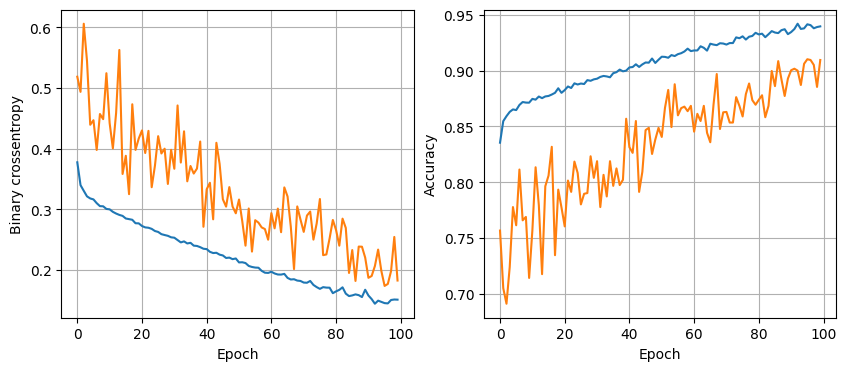

119/119 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.8499
64 nodes, dropout 0, lr 0.005, batch size 64


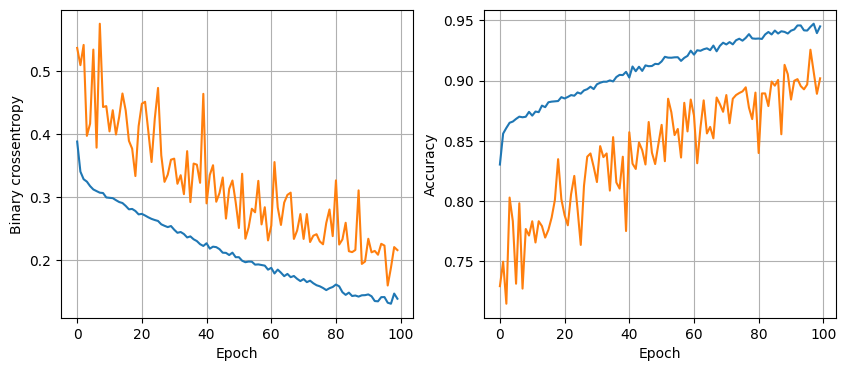

119/119 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.8549
64 nodes, dropout 0, lr 0.005, batch size 128


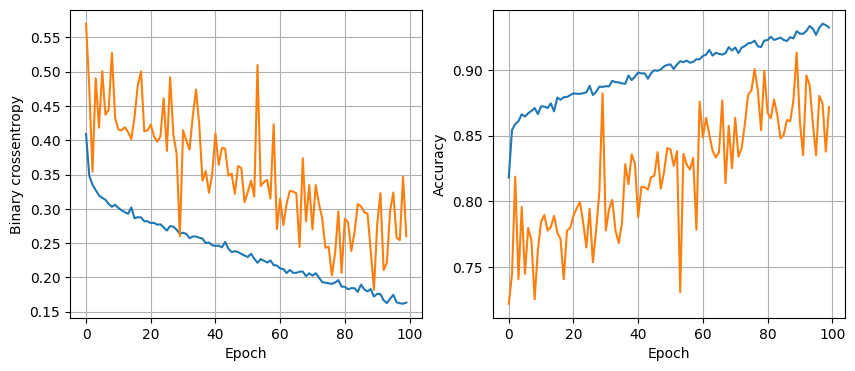

119/119 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.8612
64 nodes, dropout 0, lr 0.001, batch size 32


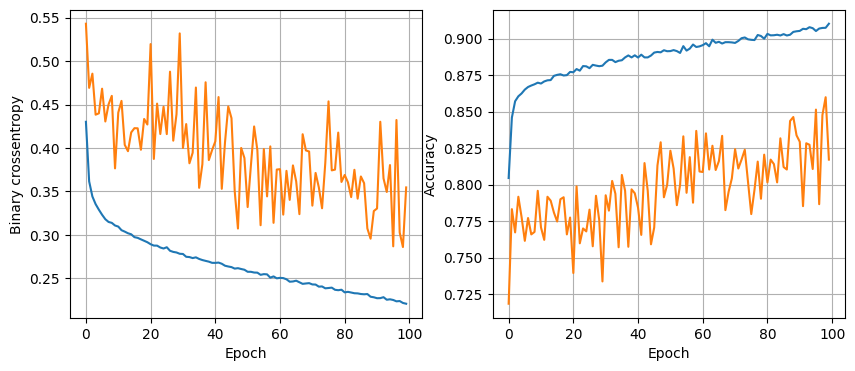

119/119 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8641
64 nodes, dropout 0, lr 0.001, batch size 64


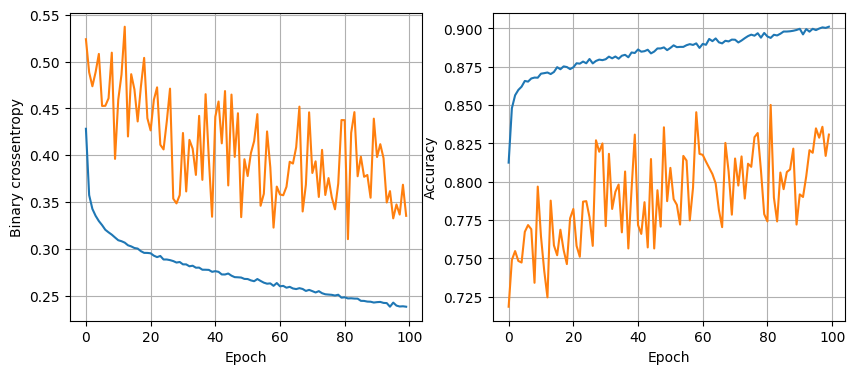

119/119 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.001, batch size 128


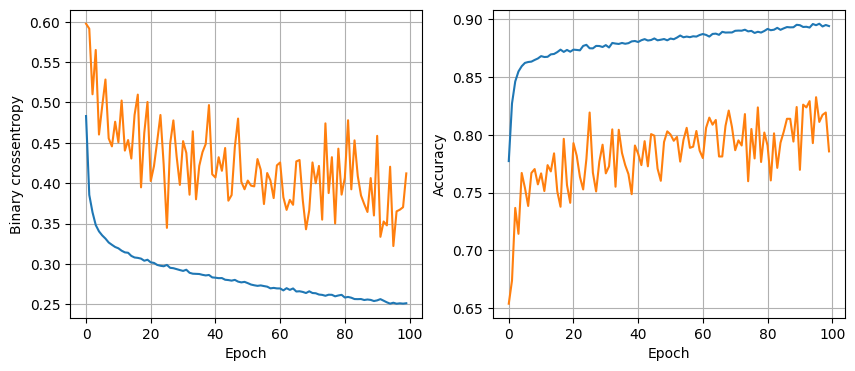

119/119 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.8701
64 nodes, dropout 0.2, lr 0.01, batch size 32


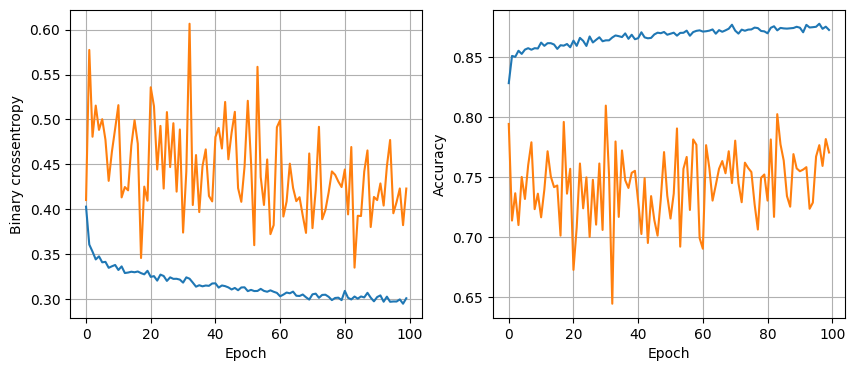

119/119 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.01, batch size 64


KeyboardInterrupt: 

In [33]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [35]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 4ms/step


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1317
           1       0.88      0.94      0.91      2487

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

